#**Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Thyroid_Detection/trainedDataset.csv',index_col=0)
df.head(10)

,Age,Sex,parameterT3,parameterT4,parameterTSH,Result
0,57.2,F,120.00,8.92,1.78,Ok
1,33.0,F,108.10,8.68,3.12,Ok
2,47.0,F,112.50,7.76,1.19,Ok
3,35.0,F,128.80,9.83,2.57,Ok
4,44.0,M,74.34,3.48,25.10,Hypothyroidism
5,69.3,M,111.70,8.14,0.44,Primary Hyperthyroidism
6,29.0,F,132.00,7.72,1.53,Ok
7,37.0,F,94.28,6.84,7.68,Primary Hypothyroidism
8,42.0,F,96.62,8.25,1.37,Ok
9,45.0,F,110.10,6.95,10.03,Primary Hypothyroidism


#*Label-Encoding*

In [ ]:
encode= LabelEncoder()
#Sex
t=encode.fit_transform(df['Sex'])
df.drop(columns='Sex',inplace=True)
df['Sex']=t

#Result
t=encode.fit_transform(df['Result'])
df.drop(columns='Result',inplace=True)
df['Result']=t

df

,Age,parameterT3,parameterT4,parameterTSH,Sex,Result
0,57.2,120.00,8.92,1.78,0,4
1,33.0,108.10,8.68,3.12,0,4
2,47.0,112.50,7.76,1.19,0,4
3,35.0,128.80,9.83,2.57,0,4
4,44.0,74.34,3.48,25.10,1,2
...,...,...,...,...,...,...
5739,32.0,99.37,5.98,2.98,0,4
5740,47.0,106.30,9.64,2.02,0,4
5741,53.0,129.50,10.23,1.70,0,4
5742,40.0,115.50,7.74,1.87,0,4


#**Conversion of string to int**

In [ ]:
df['parameterT3']=pd.to_numeric(df['parameterT3'])
df['parameterT4']=pd.to_numeric(df['parameterT4'])
df['parameterTSH']=pd.to_numeric(df['parameterTSH'])
df['Result']=pd.to_numeric(df['Result'])

#**Splitting of data**

In [ ]:
X=df.iloc[0:,:5]
y=df.iloc[0:,5]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X

,Age,parameterT3,parameterT4,parameterTSH,Sex
0,57.2,120.00,8.92,1.78,0
1,33.0,108.10,8.68,3.12,0
2,47.0,112.50,7.76,1.19,0
3,35.0,128.80,9.83,2.57,0
4,44.0,74.34,3.48,25.10,1
...,...,...,...,...,...
5739,32.0,99.37,5.98,2.98,0
5740,47.0,106.30,9.64,2.02,0
5741,53.0,129.50,10.23,1.70,0
5742,40.0,115.50,7.74,1.87,0


#**Logistic Regression**

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Metric Values**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


acc=  0.7513927576601671
              precision    recall  f1-score   support

           1       0.58      0.47      0.52        15
           2       0.80      0.53      0.64        30
           3       0.51      0.33      0.40       213
           4       0.79      0.97      0.87       903

   micro avg       0.76      0.84      0.80      1161
   macro avg       0.67      0.58      0.61      1161
weighted avg       0.73      0.84      0.77      1161

MCC= 0.5111487156738418
[[  0   1   0   0   2   0   0   0]
 [  0   7   0   0   6   0   2   0]
 [  0   0  16   3   0   0   0  11]
 [  0   1   4  70 106   0   8  24]
 [  0   1   0  23 879   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   2   0   0  58   0  18   0]
 [  0   0   0  42  62   0   0  89]]


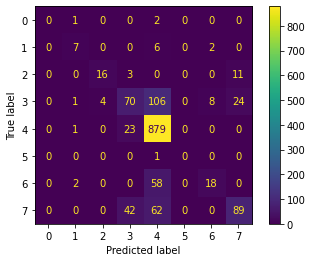

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(log_reg, X_test, y_test)  
plt.show()



#**Random Forest**

In [ ]:
ranfor=RandomForestClassifier(random_state=42,n_estimators=1000)
ranfor.fit(X_train,y_train)
y_pred = ranfor.predict(X_test)

acc=  0.9937325905292479
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        30
           3       1.00      0.98      0.99       213
           4       1.00      1.00      1.00       903

   micro avg       1.00      1.00      1.00      1161
   macro avg       1.00      0.99      1.00      1161
weighted avg       1.00      1.00      1.00      1161

MCC= 0.988819562565183
[[  2   0   0   0   0   0   1   0]
 [  0  15   0   0   0   0   0   0]
 [  0   0  30   0   0   0   0   0]
 [  0   0   0 208   2   0   1   2]
 [  0   0   0   0 903   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  78   0]
 [  0   0   0   0   2   0   0 191]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


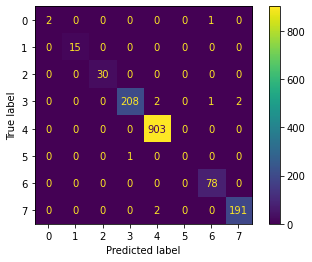

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(ranfor, X_test, y_test)  
plt.show()


#**SVC**

In [ ]:
SVCclassifier = SVC(kernel = 'linear', random_state = 42)
SVCclassifier.fit(X_train, y_train)
y_pred = SVCclassifier.predict(X_test)

acc=  0.8802228412256268
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        15
           2       0.95      0.67      0.78        30
           3       0.71      0.54      0.62       213
           4       0.91      0.99      0.95       903

   micro avg       0.89      0.90      0.89      1161
   macro avg       0.88      0.78      0.82      1161
weighted avg       0.88      0.90      0.88      1161

MCC= 0.7802503857496422
[[  2   0   0   0   0   0   1   0]
 [  1  14   0   0   0   0   0   0]
 [  0   0  20  10   0   0   0   0]
 [  2   1   1 116  69   3   6  15]
 [  0   0   0   2 892   0   1   8]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   3   9   0  66   0]
 [  0   0   0  32   7   0   0 154]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


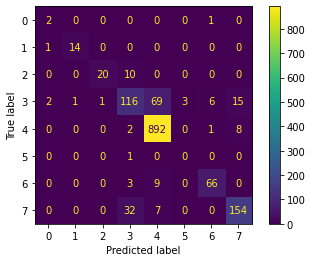

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(SVCclassifier, X_test, y_test)  
plt.show()


#**Gaussian**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

acc=  0.8084958217270195
              precision    recall  f1-score   support

           1       0.81      0.87      0.84        15
           2       0.70      0.53      0.60        30
           3       0.59      0.25      0.35       213
           4       0.82      0.99      0.90       903

   micro avg       0.80      0.84      0.82      1161
   macro avg       0.73      0.66      0.67      1161
weighted avg       0.77      0.84      0.79      1161

MCC= 0.6388447414196123
[[  1   0   0   0   0   0   2   0]
 [  2  13   0   0   0   0   0   0]
 [  0   0  16  14   0   0   0   0]
 [  0   3   6  54 129   3   8  10]
 [  0   0   0   8 895   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  1   0   0   0  22   1  54   0]
 [  0   0   1  15  49   0   0 128]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


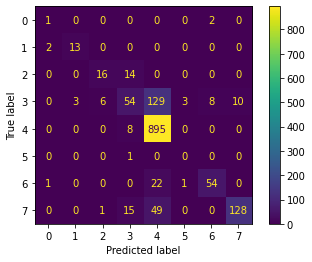

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(gnb, X_test, y_test)  
plt.show()


#**KNeighbors**

In [ ]:
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNC.fit(X_train, y_train)
y_pred = KNC.predict(X_test)

acc=  0.8488857938718662
              precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.79      0.73      0.76        30
           3       0.87      0.78      0.82       213
           4       0.85      0.98      0.91       903

   micro avg       0.85      0.94      0.89      1161
   macro avg       0.81      0.82      0.82      1161
weighted avg       0.85      0.94      0.89      1161

MCC= 0.717111804919532
[[  0   2   0   0   1   0   0   0]
 [  2  12   0   1   0   0   0   0]
 [  0   0  22   8   0   0   0   0]
 [  0   2   5 166  24   0   2  14]
 [  0   0   0  10 886   0   1   6]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   0  73   0   5   0]
 [  0   0   1   4  60   0   0 128]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


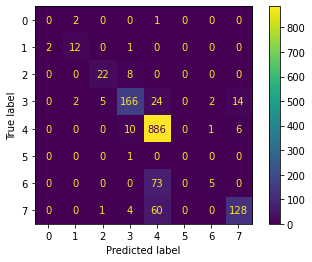

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(KNC, X_test, y_test)  
plt.show()


#**XG Boost**

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)

acc=  0.9881615598885793
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        15
           2       0.97      1.00      0.98        30
           3       0.98      0.97      0.97       213
           4       0.99      1.00      1.00       903

   micro avg       0.99      0.99      0.99      1161
   macro avg       0.98      0.96      0.97      1161
weighted avg       0.99      0.99      0.99      1161

MCC= 0.9788474025962375
[[  1   0   0   0   0   0   2   0]
 [  0  13   0   2   0   0   0   0]
 [  0   0  30   0   0   0   0   0]
 [  0   0   1 206   4   0   1   1]
 [  0   0   0   1 902   0   0   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  78   0]
 [  0   0   0   0   4   0   0 189]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


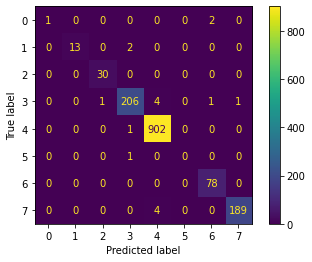

In [ ]:
print('acc= ',accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(XGB, X_test, y_test)  
plt.show()


#**Oversampling**

In [ ]:
oversample = SMOTE(k_neighbors=2)
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_over,y_over,test_size=0.25,random_state=42)

#**Logistic Regression Over**

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train_over, y_train_over)
y_pred_over=log_reg.predict(X_test_over)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


acc=  0.7270457697642164
              precision    recall  f1-score   support

           1       0.65      0.74      0.69       936
           2       0.90      0.84      0.87       914
           3       0.50      0.50      0.50       875
           4       0.79      0.65      0.71       906

   micro avg       0.70      0.69      0.69      3631
   macro avg       0.71      0.68      0.69      3631
weighted avg       0.71      0.69      0.70      3631

MCC= 0.6884263093320416
[[594 230   0   0   0   0  67   0]
 [151 691   0   0   0   0  94   0]
 [  0   0 764  40   0   0   0 110]
 [  5  34  61 441 145  59  39  91]
 [ 13  19   2 150 592  26  24  80]
 [ 26   0   0   0   0 871   0   0]
 [ 89  85   0   0  15  44 686   0]
 [  0   0  18 249   2   0   0 603]]


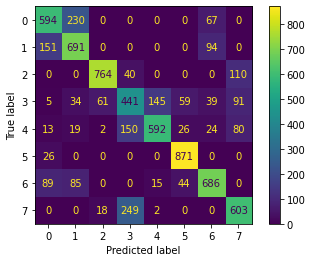

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(log_reg, X_test_over, y_test_over)  
plt.show()

#**Random Forest Over**

In [ ]:
ranfor=RandomForestClassifier(random_state=42,n_estimators=1000)
ranfor.fit(X_train_over, y_train_over)
y_pred_over = ranfor.predict(X_test_over)

acc=  0.9968099861303745
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       936
           2       1.00      1.00      1.00       914
           3       0.99      0.98      0.99       875
           4       0.99      0.99      0.99       906

   micro avg       1.00      0.99      1.00      3631
   macro avg       1.00      0.99      1.00      3631
weighted avg       1.00      0.99      1.00      3631

MCC= 0.9963551411137634
[[891   0   0   0   0   0   0   0]
 [  0 936   0   0   0   0   0   0]
 [  0   0 914   0   0   0   0   0]
 [  0   0   2 861   7   0   1   4]
 [  0   0   0   3 901   0   0   2]
 [  0   0   0   0   0 897   0   0]
 [  0   0   0   0   0   0 919   0]
 [  0   0   0   2   2   0   0 868]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


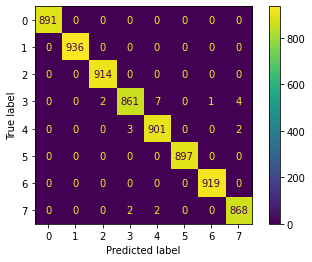

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(ranfor, X_test_over, y_test_over)  
plt.show()

#**SVC Over**

In [ ]:
SVCclassifier = SVC(kernel = 'linear', random_state = 42)
SVCclassifier.fit(X_train_over, y_train_over)
y_pred_over = SVCclassifier.predict(X_test_over)

acc=  0.9183079056865464
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       936
           2       0.95      0.95      0.95       914
           3       0.66      0.76      0.70       875
           4       0.92      0.83      0.87       906

   micro avg       0.87      0.89      0.88      3631
   macro avg       0.88      0.88      0.88      3631
weighted avg       0.88      0.89      0.88      3631

MCC= 0.9069733174913696
[[891   0   0   0   0   0   0   0]
 [  0 936   0   0   0   0   0   0]
 [  0   0 867  47   0   0   0   0]
 [ 15   6  41 663  62   1  12  75]
 [  1   0   0 133 749   0   7  16]
 [  0   0   0   0   0 897   0   0]
 [  0   0   0   2   0   0 917   0]
 [  0   0   0 167   4   0   0 701]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


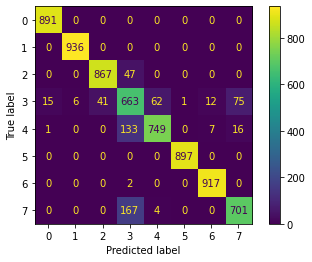

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(SVCclassifier, X_test_over, y_test_over)  
plt.show()

#**Gaussian Over**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_over, y_train_over)
y_pred_over = gnb.predict(X_test_over)

acc=  0.8323162274618585
              precision    recall  f1-score   support

           1       1.00      0.88      0.93       936
           2       0.98      0.77      0.86       914
           3       0.49      0.36      0.42       875
           4       0.64      0.94      0.76       906

   micro avg       0.77      0.74      0.75      3631
   macro avg       0.78      0.74      0.74      3631
weighted avg       0.78      0.74      0.75      3631

MCC= 0.8114355922453238
[[890   0   0   0   0   0   1   0]
 [113 823   0   0   0   0   0   0]
 [  0   0 702 209   0   0   0   3]
 [  3   3  16 318 412   5  19  99]
 [  0   0   0  14 854   0   3  35]
 [  0   0   0   1   0 896   0   0]
 [ 88   1   0   0  46  12 772   0]
 [  0   0   1 102  23   0   0 746]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


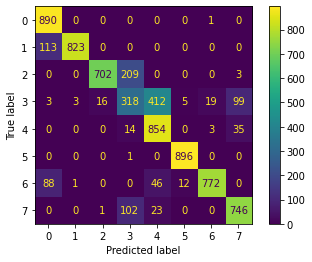

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(gnb, X_test_over, y_test_over)  
plt.show()

#**KNC Over**

In [ ]:
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNC.fit(X_train_over, y_train_over)
y_pred_over = KNC.predict(X_test_over)

acc=  0.9628294036061026
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       936
           2       0.98      1.00      0.99       914
           3       0.95      0.92      0.93       875
           4       0.97      0.81      0.88       906

   micro avg       0.97      0.93      0.95      3631
   macro avg       0.97      0.93      0.95      3631
weighted avg       0.97      0.93      0.95      3631

MCC= 0.9579062583568271
[[891   0   0   0   0   0   0   0]
 [  0 936   0   0   0   0   0   0]
 [  0   0 913   1   0   0   0   0]
 [  1   2  23 804  10   1   4  30]
 [  0   0   0  35 732   0 105  34]
 [  0   0   0   0   0 897   0   0]
 [  0   0   0   0   4   0 915   0]
 [  0   0   0   9   9   0   0 854]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


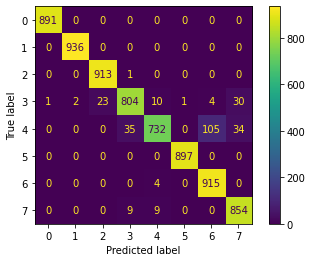

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(KNC, X_test_over, y_test_over)  
plt.show()

#**XG Boost Over** 

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train_over, y_train_over)
y_pred_over = XGB.predict(X_test_over)

acc=  0.99500693481276
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       936
           2       0.99      1.00      1.00       914
           3       0.99      0.97      0.98       875
           4       0.98      1.00      0.99       906

   micro avg       0.99      0.99      0.99      3631
   macro avg       0.99      0.99      0.99      3631
weighted avg       0.99      0.99      0.99      3631

MCC= 0.9942978549681437
[[891   0   0   0   0   0   0   0]
 [  0 936   0   0   0   0   0   0]
 [  0   0 913   1   0   0   0   0]
 [  0   0   5 850  13   0   1   6]
 [  0   0   0   3 902   0   0   1]
 [  0   0   0   0   0 897   0   0]
 [  0   0   0   1   0   0 918   0]
 [  0   0   0   3   2   0   0 867]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


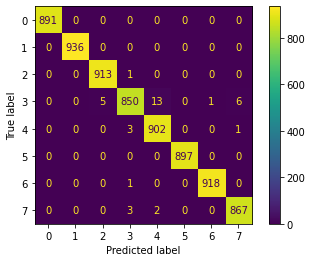

In [ ]:
print('acc= ',accuracy_score(y_test_over, y_pred_over))
print(classification_report(y_test_over, y_pred_over, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_over, y_pred_over))
print(confusion_matrix(y_test_over, y_pred_over))
plot_confusion_matrix(XGB, X_test_over, y_test_over)  
plt.show()



#**PCA**

In [ ]:
pca = PCA(n_components=4,svd_solver='full')
X_pca = pca.fit_transform(X_over)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_over, test_size = 0.25, random_state = 101)

#**Logistic Regression PCA**

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train_pca, y_train_pca)
y_pred_pca=log_reg.predict(X_test_pca)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


acc=  0.7597780859916782
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       893
           2       0.87      0.84      0.85       876
           3       0.67      0.70      0.68       925
           4       0.54      0.42      0.47       892

   micro avg       0.78      0.74      0.76      3586
   macro avg       0.77      0.74      0.75      3586
weighted avg       0.76      0.74      0.75      3586

MCC= 0.7294083489952181
[[882  10   0   0   0   0   0   0]
 [  0 888   0   0   0   0   5   0]
 [  0   1 736  85   0  54   0   0]
 [ 21   5  62 646   7 108  70   6]
 [  6   1   1  64 372 104 307  37]
 [  0   0   0   0   0 901   0   0]
 [ 34   0   0   0 184  18 705   0]
 [ 25   1  47 170 123 123  53 348]]


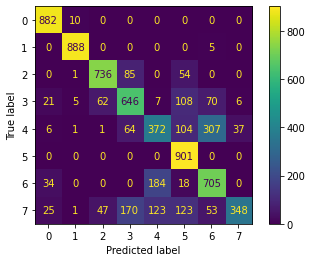

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(log_reg, X_test_pca, y_test_pca)  
plt.show()

#**Random Forest PCA**

In [ ]:
ranfor=RandomForestClassifier(random_state=1000,n_estimators=300)
ranfor.fit(X_train_pca, y_train_pca)
y_pred_pca = ranfor.predict(X_test_pca)

acc=  0.9855755894590846
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       1.00      1.00      1.00       876
           3       0.98      0.97      0.97       925
           4       0.97      0.93      0.95       892

   micro avg       0.99      0.98      0.98      3586
   macro avg       0.99      0.98      0.98      3586
weighted avg       0.99      0.98      0.98      3586

MCC= 0.9835370466065387
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 876   0   0   0   0   0]
 [  0   1   4 894  18   1   3   4]
 [  0   0   0  11 834   0  33  14]
 [  0   0   0   1   0 900   0   0]
 [  0   0   0   2   6   0 933   0]
 [  0   0   0   5   1   0   0 884]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


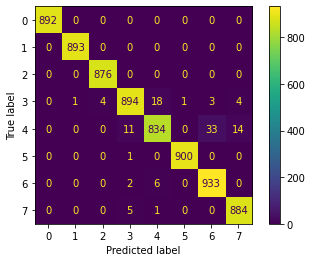

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(ranfor, X_test_pca, y_test_pca)  
plt.show()

#**SVC PCA**

In [ ]:
SVCclassifier = SVC(kernel = 'linear', random_state = 42)
SVCclassifier.fit(X_train_pca, y_train_pca)
y_pred_pca = SVCclassifier.predict(X_test_pca)

acc=  0.9205270457697642
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       893
           2       0.96      0.96      0.96       876
           3       0.68      0.77      0.72       925
           4       0.91      0.82      0.86       892

   micro avg       0.88      0.89      0.88      3586
   macro avg       0.89      0.89      0.89      3586
weighted avg       0.88      0.89      0.88      3586

MCC= 0.9094113597948996
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 844  32   0   0   0   0]
 [ 17   5  34 710  65   1  11  82]
 [  1   0   0 139 735   0   3  14]
 [  0   0   0   0   0 901   0   0]
 [  0   0   0   6   0   0 935   0]
 [  0   0   0 154   9   0   0 727]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


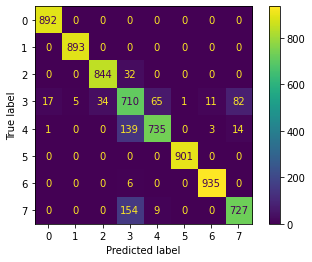

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(SVCclassifier, X_test_pca, y_test_pca)  
plt.show()

#**Gaussian PCA**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train_pca)
y_pred_pca = gnb.predict(X_test_pca)

acc=  0.7220527045769765
              precision    recall  f1-score   support

           1       0.98      0.84      0.90       893
           2       0.96      0.60      0.74       876
           3       0.60      0.49      0.54       925
           4       0.41      0.75      0.53       892

   micro avg       0.64      0.67      0.66      3586
   macro avg       0.74      0.67      0.68      3586
weighted avg       0.73      0.67      0.68      3586

MCC= 0.6894704857920233
[[892   0   0   0   0   0   0   0]
 [142 751   0   0   0   0   0   0]
 [  0   0 526 246  76   2   0  26]
 [ 32  16  15 451 225  16 126  44]
 [ 14   0   0  14 671   1 153  39]
 [  0   0   0   0   0 901   0   0]
 [ 35   0   0  17 264   0 620   5]
 [ 16   0   6  25 418   0  31 394]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


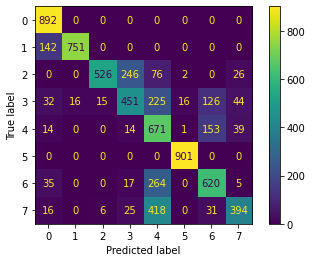

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(gnb, X_test_pca, y_test_pca)  
plt.show()

#**KNC PCA**

In [ ]:
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNC.fit(X_train_pca, y_train_pca)
y_pred_pca = KNC.predict(X_test_pca)

acc=  0.9615811373092926
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       0.97      1.00      0.99       876
           3       0.96      0.90      0.93       925
           4       0.96      0.82      0.89       892

   micro avg       0.97      0.93      0.95      3586
   macro avg       0.97      0.93      0.95      3586
weighted avg       0.97      0.93      0.95      3586

MCC= 0.9563962713663092
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 875   1   0   0   0   0]
 [  3   2  23 836  15   6   7  33]
 [  0   0   0  23 735   0  88  46]
 [  0   0   0   0   0 901   0   0]
 [  0   0   0   0   9   0 932   0]
 [  0   0   0  11  10   0   0 869]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


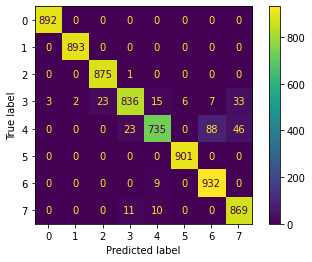

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(KNC, X_test_pca, y_test_pca)  
plt.show()

#**XG Boost PCA**

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train_pca, y_train_pca)
y_pred_pca = XGB.predict(X_test_pca)

acc=  0.9601941747572815
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       0.98      1.00      0.99       876
           3       0.96      0.92      0.94       925
           4       0.94      0.81      0.87       892

   micro avg       0.97      0.93      0.95      3586
   macro avg       0.97      0.93      0.95      3586
weighted avg       0.97      0.93      0.95      3586

MCC= 0.9547732139201012
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 875   1   0   0   0   0]
 [  2   3  16 854  23   1   5  21]
 [  0   0   0  17 721   0 102  52]
 [  0   0   0   1   0 900   0   0]
 [  0   0   0   1  26   0 914   0]
 [  0   0   0  15   1   0   0 874]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


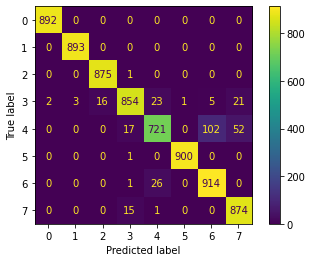

In [ ]:
print('acc= ',accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_pca, y_pred_pca))
print(confusion_matrix(y_test_pca, y_pred_pca))
plot_confusion_matrix(XGB, X_test_pca, y_test_pca)  
plt.show()

#**LDA**

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=4)
X_lda = lda.fit_transform(X_over, y_over)
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y_over, test_size = 0.25, random_state = 101)

#**Logistic LDA**

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train_lda, y_train_lda)
y_pred_lda=log_reg.predict(X_test_lda)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


acc=  0.789875173370319
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       0.94      0.98      0.96       876
           3       0.59      0.69      0.64       925
           4       0.51      0.35      0.42       892

   micro avg       0.77      0.75      0.76      3586
   macro avg       0.76      0.75      0.75      3586
weighted avg       0.76      0.75      0.75      3586

MCC= 0.7608133566451548
[[892   0   0   0   0   0   0   0]
 [  2 891   0   0   0   0   0   0]
 [  0   0 858  17   0   1   0   0]
 [ 13   4  53 635  36  32  72  80]
 [  1   0   0 180 311   0 230 170]
 [  0   0   0   0   0 901   0   0]
 [ 21   0   0  50  83   0 712  75]
 [  0   0   0 189 176   0  30 495]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


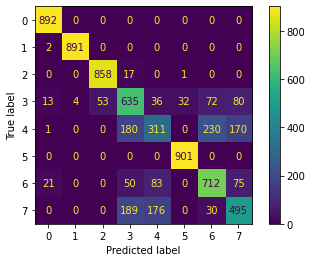

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(log_reg, X_test_lda, y_test_lda)  
plt.show()

#**Random Forest LDA**

In [ ]:
ranfor=RandomForestClassifier(random_state=1000,n_estimators=300)
ranfor.fit(X_train_lda, y_train_lda)
y_pred_lda = ranfor.predict(X_test_lda)

acc=  0.9295423023578363
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       0.99      1.00      0.99       876
           3       0.94      0.95      0.95       925
           4       0.75      0.73      0.74       892

   micro avg       0.92      0.92      0.92      3586
   macro avg       0.92      0.92      0.92      3586
weighted avg       0.92      0.92      0.92      3586

MCC= 0.9194875376894683
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 873   3   0   0   0   0]
 [  4   1  11 879  20   0   3   7]
 [  0   0   1  33 650   0 135  73]
 [  0   0   0   0   0 901   0   0]
 [  0   0   0   4 110   0 824   3]
 [  0   0   0  12  84   0   4 790]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


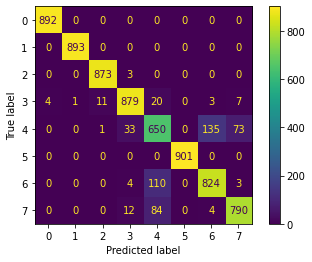

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(ranfor, X_test_lda, y_test_lda)  
plt.show()

#**SVC LDA**

In [ ]:
SVCclassifier = SVC(kernel = 'linear', random_state = 42)
SVCclassifier.fit(X_train_lda, y_train_lda)
y_pred_lda = SVCclassifier.predict(X_test_lda)

acc=  0.802924791086351
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        16
           2       0.67      0.72      0.69        36
           3       0.69      0.44      0.54       222
           4       0.81      0.99      0.89       888

   micro avg       0.79      0.88      0.83      1162
   macro avg       0.78      0.79      0.77      1162
weighted avg       0.78      0.88      0.82      1162

MCC= 0.6328314573444922
[[  4   0   0   0   0   0   0   0]
 [  0  16   0   0   0   0   0   0]
 [  0   0  26   9   1   0   0   0]
 [  2   1  12  97  95   0   0  15]
 [  0   0   0   4 882   0   0   2]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   0  72   0   0   0]
 [  0   0   0  30  39   0   0 128]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


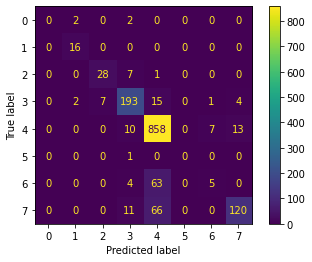

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(ranfor, X_test_lda, y_test_lda)  
plt.show()

#**Gaussian LDA**

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_lda, y_train_lda)
y_pred_lda = gnb.predict(X_test_lda)

acc=  0.7026462395543176
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        16
           2       0.72      0.50      0.59        36
           3       0.65      0.41      0.51       222
           4       0.71      0.97      0.82       888

   micro avg       0.71      0.85      0.77      1162
   macro avg       0.77      0.67      0.70      1162
weighted avg       0.71      0.85      0.76      1162

MCC= 0.40927457062556927
[[  4   0   0   0   0   0   0   0]
 [  3  13   0   0   0   0   0   0]
 [  0   0  18  15   3   0   0   0]
 [  6   0   6  92 111   0   2   5]
 [  0   0   0  17 862   0   9   0]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   2  64   0   6   0]
 [  0   0   1  14 168   0   0  14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


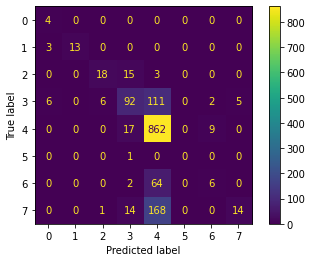

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(gnb, X_test_lda, y_test_lda)  
plt.show()

#**KNC LDA**

In [ ]:
KNC = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNC.fit(X_train_lda, y_train_lda)
y_pred_lda = KNC.predict(X_test_lda)

acc=  0.7527855153203342
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        16
           2       0.81      0.83      0.82        36
           3       0.65      0.64      0.64       222
           4       0.79      0.91      0.85       888

   micro avg       0.77      0.86      0.81      1162
   macro avg       0.76      0.85      0.80      1162
weighted avg       0.76      0.86      0.81      1162

MCC= 0.5363104182201189
[[  1   2   0   1   0   0   0   0]
 [  0  16   0   0   0   0   0   0]
 [  0   0  30   6   0   0   0   0]
 [  0   2   7 141  56   0   0  16]
 [  0   0   0  42 812   0   8  26]
 [  0   0   0   1   0   0   0   0]
 [  0   0   0   5  60   0   7   0]
 [  0   0   0  21 101   0   1  74]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


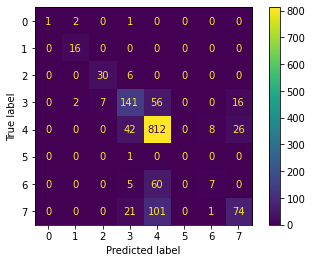

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(KNC, X_test_lda, y_test_lda)  
plt.show()

#**XG Boost LDA**

In [ ]:
XGB = XGBClassifier()
XGB.fit(X_train_lda, y_train_lda)
y_pred_lda = XGB.predict(X_test_lda)

acc=  0.8400832177531207
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       893
           2       0.95      0.99      0.97       876
           3       0.89      0.84      0.87       925
           4       0.54      0.46      0.50       892

   micro avg       0.86      0.82      0.84      3586
   macro avg       0.85      0.82      0.83      3586
weighted avg       0.85      0.82      0.83      3586

MCC= 0.8176084565218253
[[892   0   0   0   0   0   0   0]
 [  0 893   0   0   0   0   0   0]
 [  0   0 865   9   0   2   0   0]
 [  6   2  38 781  24   1  30  43]
 [  0   0   0  55 406   0 196 235]
 [  0   0   3   0   0 898   0   0]
 [  0   0   0  11 189   0 659  82]
 [  0   0   0  24 128   0  75 663]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


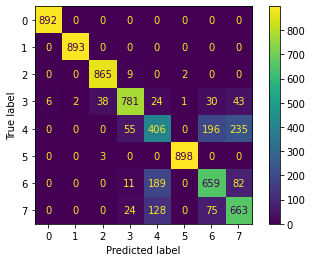

In [ ]:
print('acc= ',accuracy_score(y_test_lda, y_pred_lda))
print(classification_report(y_test_lda, y_pred_lda, labels=[1, 2, 3,4]))
print('MCC=',matthews_corrcoef(y_test_lda, y_pred_lda))
print(confusion_matrix(y_test_lda, y_pred_lda))
plot_confusion_matrix(XGB, X_test_lda, y_test_lda)  
plt.show()

#**Classification using ANN**

In [ ]:
#Check null and data types values for each parameter
print(f'nulls values: \n{df.isnull().sum()}')
print(f'data types: \n')

nulls values: 
Age             0
parameterT3     0
parameterT4     0
parameterTSH    0
Sex             0
Result          0
dtype: int64
data types: 



In [ ]:
# Splitting the dataset
X=df.iloc[0:,:5]
y=df.iloc[0:,5]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(f'train dataset shape: {x_train.shape} ')
print(f'test dataset shape: {x_test.shape}')

train dataset shape: (4595, 5) 
test dataset shape: (1149, 5)


In [ ]:
# Standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# keras neural network
model = Sequential()
model.add(Dense(256, input_shape=[X.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

#Output layer
model.add(Dense(8, activation='sigmoid')) # 8 for the number of classes present in the dataset i.e. 7

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 5

In [ ]:
model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Using Early stopping and Reduce learning rate methods in keras to improve the training phase of model

lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 20,
                         verbose = 1,
                         factor = 0.75)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)

In [ ]:
%%time
history = model.fit(x=x_train, y=y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=64, validation_split=0.1)

Epoch 1/100
65/65 [==============================] - 1s 6ms/step - loss: 0.8965 - accuracy: 0.7112 - val_loss: 0.5304 - val_accuracy: 0.8065 - lr: 0.0100
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.8268 - val_loss: 0.3183 - val_accuracy: 0.8826 - lr: 0.0100
Epoch 3/100
65/65 [==============================] - 0s 4ms/step - loss: 0.4297 - accuracy: 0.8474 - val_loss: 0.3440 - val_accuracy: 0.9065 - lr: 0.0100
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3554 - accuracy: 0.8680 - val_loss: 0.2538 - val_accuracy: 0.9065 - lr: 0.0100
Epoch 5/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3685 - accuracy: 0.8631 - val_loss: 0.2182 - val_accuracy: 0.9217 - lr: 0.0100
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8793 - val_loss: 0.2923 - val_accuracy: 0.8826 - lr: 0.0100
Epoch 7/100
65/65 [==============================] - 0s 3ms/step - loss: 0.3

In [ ]:
model.evaluate(x_test, y_test)

36/36 [==============================] - 0s 1ms/step - loss: 0.1392 - accuracy: 0.9591


[0.13921283185482025, 0.9590948820114136]

#**Plotting Loss curves**

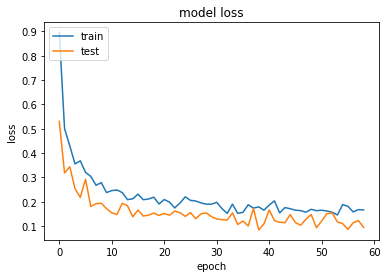

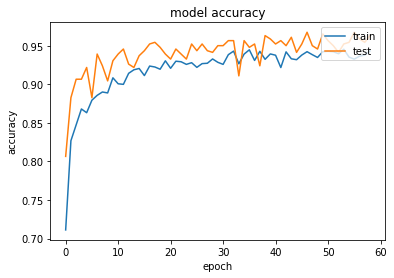

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
model.save('model.h5')

In [ ]:
print(y_test.values.tolist())
y_pred_class = np.argmax(model.predict(x_test), axis=-1) ## xtest => test image
y_pred = model.predict(x_test)               ## xtest => test image
y_test_class = y_test.values.tolist()     ## ytest => test image's label
print(y_pred_class)
print(classification_report(y_test, y_pred))

#**Testing**

In [ ]:
dfTesting= pd.read_csv('/content/drive/MyDrive/Thyroid_Detection/Testing_data.csv',index_col=0)
dfTesting.head(10)

,Age,Sex,parameterT3,parameterT4,parameterTSH,Result
0,63,F,5.5,199,0.030,Hyperthyroid
1,87,F,1.7,162,0.150,Hyperthyroid
2,70,F,2.6,160,0.005,Hyperthyroid
3,65,F,3.5,217,0.150,Hyperthyroid
4,55,F,5.5,219,0.010,Hyperthyroid
5,87,F,3.4,164,0.200,Hyperthyroid
6,49,F,2.1,183,0.035,Hyperthyroid
7,59,F,1.8,162,0.020,Hyperthyroid
8,15,F,6.0,250,0.015,Hyperthyroid
9,27,F,5.3,272,0.020,Hyperthyroid


In [ ]:
encode= LabelEncoder()
#Sex
t=encode.fit_transform(dfTesting['Sex'])
dfTesting.drop(columns='Sex',inplace=True)
dfTesting['Sex']=t

#Result
t=encode.fit_transform(dfTesting['Result'])
dfTesting.drop(columns='Result',inplace=True)
dfTesting['Result']=t

In [ ]:
dfTesting['parameterT3']=pd.to_numeric(dfTesting['parameterT3'])*10
dfTesting['parameterT4']=pd.to_numeric(dfTesting['parameterT4'])
dfTesting['parameterTSH']=pd.to_numeric(dfTesting['parameterTSH'])*10
dfTesting['Result']=pd.to_numeric(dfTesting['Result'])

In [ ]:
X_Testing=dfTesting.iloc[0:,:5]
y_Testing=dfTesting.iloc[0:,5]
X_Testing

,Age,parameterT3,parameterT4,parameterTSH,Sex
0,63,55.0,199,0.30,0
1,87,17.0,162,1.50,0
2,70,26.0,160,0.05,0
3,65,35.0,217,1.50,0
4,55,55.0,219,0.10,0
...,...,...,...,...,...
150,27,16.0,82,150.00,0
151,54,22.0,83,190.00,0
152,69,23.0,97,18.00,0
153,87,16.0,71,30.00,0


In [ ]:
y_Predicted = XGB.predict(X_Testing)
y_Predicted

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [ ]:
y_Testing

0      0
1      0
2      0
3      0
4      0
      ..
150    2
151    2
152    2
153    2
154    2
Name: Result, Length: 155, dtype: int64

In [ ]:
accuracy_score(y_Testing, y_Predicted)

0.0

In [ ]:
len(list(df.loc[df["Result"]==3].index))

906